In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-fdconverge-round)

Let $f(x)=e^{-1.3x}$. We apply finite-difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [2]:
f = lambda x: exp(-1.3 * x)
exact = -1.3

h_ = array([1 / 10**(n+1) for n in range(12)])
FD = zeros((len(h_), 3))
for (i, h) in enumerate(h_):
    nodes = h * linspace(-2, 2, 5)
    vals = f(nodes)
    FD[i, 0] = dot(array([0, 0, -1, 1, 0]) / h, vals)
    FD[i, 1] = dot(array([0, -1/2, 0, 1/2, 0]) / h, vals)
    FD[i, 2] = dot(array([1/12, -2/3, 0, 2/3, -1/12]) / h, vals)

results = PrettyTable()
results.add_column("h", h_)
results.add_column("FD1", FD[:, 0])
results.add_column("FD2", FD[:, 1])
results.add_column("FD4", FD[:, 2])
print(results)

+--------+---------------------+---------------------+---------------------+
|   h    |         FD1         |         FD2         |         FD4         |
+--------+---------------------+---------------------+---------------------+
|  0.1   | -1.2190456907943865 | -1.3036647620203026 |  -1.299987598641898 |
|  0.01  | -1.2915864979712381 | -1.3000366169760815 | -1.2999999987623418 |
| 0.001  | -1.2991553660477848 | -1.3000003661667074 | -1.2999999999999687 |
| 0.0001 | -1.2999155036613956 |  -1.300000003662075 | -1.3000000000002956 |
| 1e-05  | -1.2999915500404313 | -1.3000000000396366 | -1.3000000000138243 |
| 1e-06  |  -1.299999154987745 | -1.2999999999900496 | -1.3000000000320142 |
| 1e-07  | -1.2999999150633812 | -1.3000000000289944 |  -1.300000001094304 |
| 1e-08  | -1.2999999970197678 | -1.3000000042305544 | -1.3000000128522515 |
| 1e-09  | -1.2999999523162842 | -1.3000000340328768 | -1.3000001162290573 |
| 1e-10  | -1.2999992370605469 | -1.2999996723115146 | -1.3000001907348633 |

They all seem to be converging to $-1.3$. The convergence plot reveals some interesting structure to the errors, though.

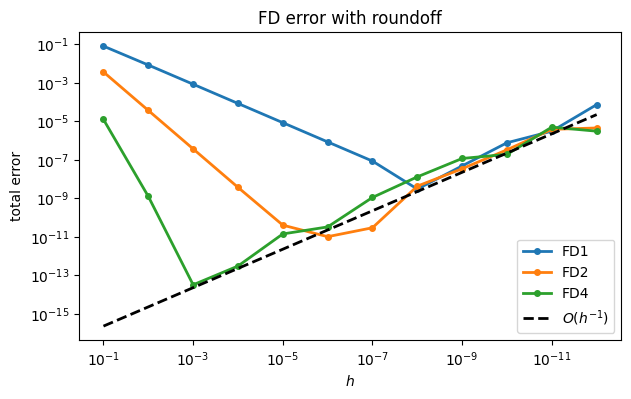

In [3]:
loglog(h_, abs(FD[:, 0] + 1.3), "-o", label="FD1")
loglog(h_, abs(FD[:, 1] + 1.3), "-o", label="FD2")
loglog(h_, abs(FD[:, 2] + 1.3), "-o", label="FD4")
gca().invert_xaxis()
plot(h_, 0.1 * 2 ** (-52) / h_, "--", color="k", label="$O(h^{-1})$")
xlabel("$h$")
ylabel("total error")
title("FD error with roundoff")
legend();

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the fourth-order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy).